2)**Salary_hike** -> Build a prediction model for Salary_hike 

**Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python**.

In [60]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (3).csv


In [61]:
df=pd.read_csv("Salary_Data.csv")

In [62]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

#Predicting delivery Time using sorting time

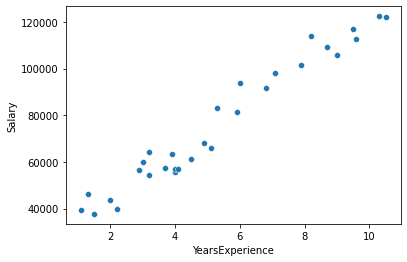

In [65]:
sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])

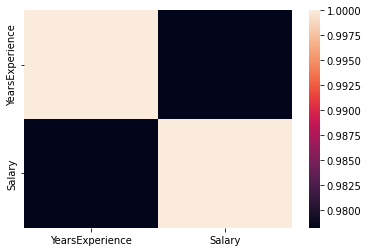

In [66]:
df.corr()#correlation
sns.heatmap(df.corr())

In [67]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [68]:
x=np.array(df["Salary"])
print("Dimension :",x.ndim)
print("shape :",x.shape)

Dimension : 1
shape : (30,)


In [69]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [70]:
y=np.array(df["YearsExperience"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [71]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  24
Length of Y_train :  24
Length of X_test :  6
Length of Y_test :  6


In [73]:
x_test

array([[55794.],
       [46205.],
       [56642.],
       [57189.],
       [57081.],
       [64445.]])

In [74]:
y_test

array([[4. ],
       [1.3],
       [2.9],
       [3.7],
       [4.1],
       [3.2]])

In [75]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [76]:
model.score(x_test,y_test)

0.38988784306112867

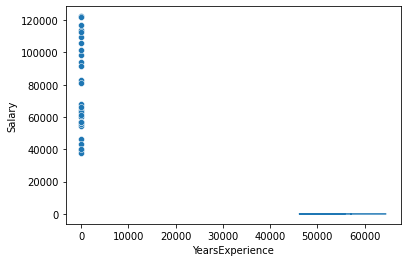

In [77]:
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [78]:
model.coef_

array([[0.00010025]])

In [79]:
model.intercept_

array([-2.27317618])

In [80]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[3.32],
       [2.36],
       [3.41],
       [3.46],
       [3.45],
       [4.19]])

In [81]:
x_test[0:,0]

array([55794., 46205., 56642., 57189., 57081., 64445.])

In [82]:
y_test[0:,0]

array([4. , 1.3, 2.9, 3.7, 4.1, 3.2])

In [83]:
df1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
df1 = pd.DataFrame(df1)
df1.to_csv("C:\\Users\\predicted_delivery_time.csv")
df1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,55794.0,4.0,3.32
1,46205.0,1.3,2.36
2,56642.0,2.9,3.41
3,57189.0,3.7,3.46
4,57081.0,4.1,3.45


In [84]:
import statsmodels.formula.api as smf

In [85]:
linear_model = smf.ols("y~x", data=df).fit()

In [86]:
linear_model.params

Intercept   -2.383161
x            0.000101
dtype: float64

In [87]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        15:41:48   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
x              0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#EDA-EXPLORATORY DATA ANALYSIS

Describing data

In [88]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Duplicates

In [89]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

Unique values

In [90]:
df["Salary"].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [91]:
df["YearsExperience"].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

#Visualisation

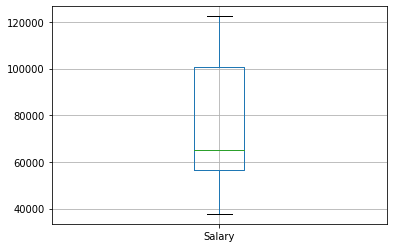

In [92]:
#Box plot
df.boxplot(column=['Salary'],grid=True)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

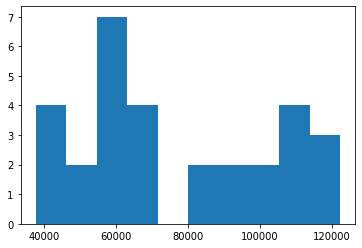

In [93]:
plt.hist(df['Salary'])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

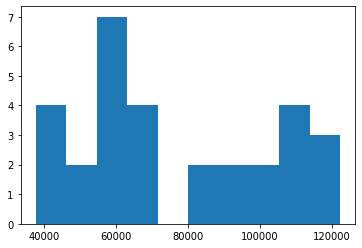

In [94]:
plt.hist(df['Salary'])

Checking Null Values

In [95]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#Transformation

**Log Transformation**

In [96]:
import statsmodels.api as sm

In [97]:
x_log = np.log(df['Salary'])

In [98]:
y_log = np.log(df['YearsExperience'])

In [99]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    8.60e-15
Time:                        15:41:50   Log-Likelihood:                         -25.557
No. Observations:                  30   AIC:                                      53.11
Df Residuals:                      29   BIC:                                      54.52
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         0.1362      0.009     14.461      0.000       0.117       0.156
==============================================================================
Omnibus:                        2.480   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.117
Skew:                          -0.631   Prob(JB):                        0.347
Kurtosis:                       2.680   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Square_root Transformation**

In [101]:
x_sqrt = np.sqrt(df['Salary'])
y_sqrt = np.sqrt(df['YearsExperience'])

In [102]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    2.81e-29
Time:                        15:41:50   Log-Likelihood:                         -1.5909
No. Observations:                  30   AIC:                                      5.182
Df Residuals:                      29   BIC:                                      6.583
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         0.0083      0.000     48.352      0.000       0.008       0.009
==============================================================================
Omnibus:                        2.613   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.048
Skew:                          -0.636   Prob(JB):                        0.359
Kurtosis:                       2.856   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Zero Transformation**

In [104]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    2.56e-24
Time:                        15:41:50   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.341e-05   2.27e-06     32.376      0.000    6.88e-05    7.81e-05
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.709
Skew:                           0.152   Prob(JB):                        0.701
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Label Encoding**

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
df['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [109]:
df['YearsExperience'].value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

In [110]:
#Changes does not effect the "data" dataframe
data1=df.copy()

In [111]:
labelencoder = LabelEncoder()
df['Sorting Time'] = labelencoder.fit_transform(df.iloc[:,-1])
df

,YearsExperience,Salary,Sorting Time
0,1.1,39343.0,1
1,1.3,46205.0,4
2,1.5,37731.0,0
3,2.0,43525.0,3
4,2.2,39891.0,2
5,2.9,56642.0,7
6,3.0,60150.0,11
7,3.2,54445.0,5
8,3.2,64445.0,14
9,3.7,57189.0,10


In [113]:
df['Salary'].value_counts()

39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: Salary, dtype: int64

**One Hot Encoding**

In [114]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [116]:
enc.fit_transform(df[['Salary']]).toarray()

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0

In [117]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['Salary']]).toarray())

In [118]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# merge with main df 
data_final = df.iloc[:,0:4].join(enc_df)
data_final

,YearsExperience,Salary,Sorting Time,0,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,29
0,1.1,39343.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3,46205.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.5,37731.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,43525.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2,39891.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.9,56642.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,60150.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.2,54445.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.2,64445.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.7,57189.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
